In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pprint import pprint
import datetime

%matplotlib inline

In [2]:
# Opens MongoDB Database
client = MongoClient()
db = client['Twitter_backup']
followers = db['Followers']
followers_added = db['Followers_added']

# Feeds all the follower data into a dataframe
fof = []

for follower in followers.find():
    fof.append([follower['name'],
                follower['screen_name'], 
                follower['id'],
                follower['description'],
                follower['statuses_count'],
                follower['followers_count'],
                follower['friends_count'],
                follower['created_at'],
                follower['contributors_enabled'],
                follower['favourites_count'],
                follower['listed_count'],
                follower['location'],
                follower['lang'],
                follower['verified'],
                follower['protected']])

followers = pd.DataFrame(fof, columns=['Name',
                                       'ScreenName',
                                       'Id',
                                       'Description',
                                       'Statuses',
                                       'Followers',
                                       'Friends',
                                       'Created',
                                       'Contributors',
                                       'TweetsFavourite',
                                       'TwitterLists',
                                       'Location',
                                       'Language',
                                       'Verified',
                                       'Protected'])


# Parse data of creation as a python datetime object
def parse_time(string):
    dt_obj = datetime.datetime.strptime(string, '%a %b %d %H:%M:%S +0000 %Y')
    return dt_obj.date()

followers['Created'] = followers.Created.apply(parse_time)

followers.head()

,Name,ScreenName,Id,Description,Statuses,Followers,Friends,Created,Contributors,TweetsFavourite,TwitterLists,Location,Language,Verified,Protected
0,Gajanan Jayderao Vas,jayderao,706099569935806465,,0,0,12,2016-03-05,False,0,0,,mr,False,False
1,V murty,Vmurty2,706098210087931904,,0,1,63,2016-03-05,False,0,0,,en,False,False
2,Shubham Singh,shubham38916728,705798614426083328,,0,23,438,2016-03-04,False,0,0,,en,False,False
3,Pushpendra Rastogi,PRastogi1963,4559217552,,37,72,710,2015-12-14,False,19,0,,en,False,False
4,Zakir Khan,ZakirHbsa,706094947456282628,,1,6,79,2016-03-05,False,3,0,,en,False,False


# Twitter accounts creation date for followers

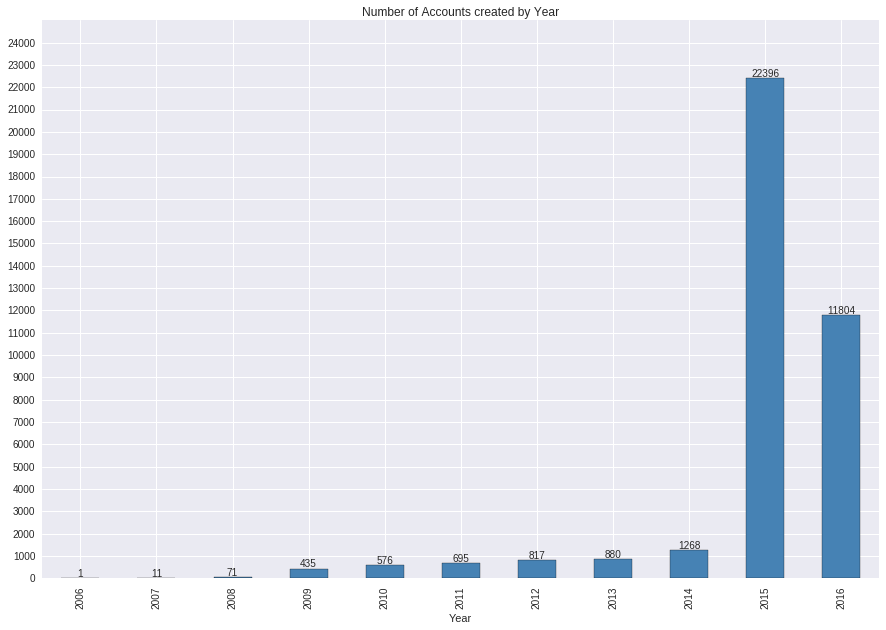

In [135]:
# Plots the creation of Twitter accunts for followers year wise
df = pd.DataFrame()
df['date'] = followers['Created']
df['date'] = df.date.astype("datetime64")
ax = df.groupby([df.date.dt.year]).count().plot(kind="bar", figsize=[15,10], color='steelblue', legend=False)
plt.yticks([(i*1000) for i in range(25)])
plt.title('Number of Accounts created by Year')
plt.xlabel('Year')

def make_appear_height(axel):
    for p in axel.patches:
        height = p.get_height()
        axel.text(p.get_x()+p.get_width()/2, int(round(height, 1)), int(1*height), ha = 'center', va = 'bottom')
    return plt.show()

make_appear_height(ax)

# Inactive Followers:

# Distribution of followers country and city wise:
    

In [4]:
loc_followers = len(followers[followers.Location != ''])
tot_followers = len(followers)
print 'The total number of followers whose location data is available is %d out of %d.' %(loc_followers,tot_followers)
print ''
print 'The data quality is pretty bad and there is no way to map our followers.'

The total number of followers whose location data is available is 10171 out of 38954.

The data quality is pretty bad and there is no way to map our followers.


# Popularity of followers:

In [5]:
q1 = followers.Followers.quantile(q=0.25)
q2 = followers.Followers.quantile(q=0.5)
q3= followers.Followers.quantile(q=0.75)
pd.DataFrame(followers.Followers.describe())

,Followers
count,38954.000000
mean,192.326026
std,7859.588562
min,0.000000
25%,1.000000
50%,4.000000
75%,12.000000
max,1230147.000000


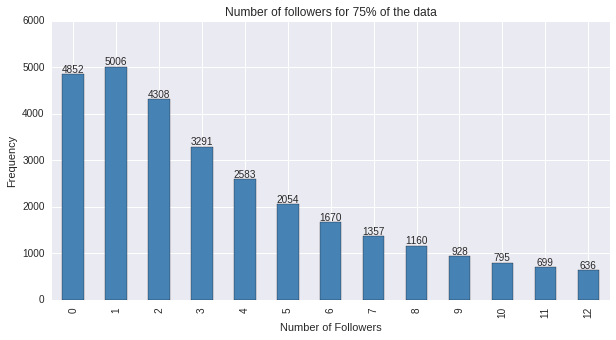

Here the total followers under consideration are 29339.


In [136]:
# Makes a df of number of followers and total followers with that number.
follower_count = pd.DataFrame(followers.groupby('Followers').count()['Name'])
follower_count['Total'] = follower_count['Name']
follower_count.drop('Name', 1, inplace=True)
follower_count.reset_index(inplace= True)

# Plots 75% of the data
tot = follower_count[follower_count.Followers <= q3].Total.sum()
ax = follower_count[follower_count.Followers <= q3].Total.plot.bar(figsize = [10,5], color = 'steelblue')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.title('Number of followers for 75% of the data')
make_appear_height(ax)

print 'Here the total followers under consideration are %i.' % tot



For the rest 25%:

In [120]:
ax = follower_count[follower_count.Followers > q3]
q3_of_q3 = int(ax.Followers.quantile(q=0.75))   # Most influential followers
ax.describe()

,Followers,Total
count,1158.000000,1158.000000
mean,5877.401554,8.303109
std,45235.370161,36.200472
min,13.000000,1.000000
25%,306.250000,1.000000
50%,698.500000,1.000000
75%,1625.250000,3.000000
max,1230147.000000,500.000000


# List of most influential followers:

In [131]:
most_inf = followers[followers.Followers >= q3_of_q3]
most_inf.sort('Followers').sort_values(by='Followers', ascending=False)  #Sorts the followers
most_inf = most_inf.reset_index(None)
most_inf.drop(['index', 'Name', 'Statuses', 'Friends', 'Created', 'Contributors' ,
               'TweetsFavourite', 'TwitterLists', 'Verified', 'Protected'], 1, inplace=True)

# Write to excel
most_inf.to_excel('/home/rudraksh/Desktop/Safecity/Twitter/Conclusions/most_influential_followers.xls',
                encoding='utf-8')

/home/rudraksh/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
